In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

pc1 = Vt.T[:, 0]
pc2 = Vt.T[:, 1]
Vt.T

array([[-0.9582517 ,  0.27637294,  0.07329168],
       [-0.24115663, -0.91892239,  0.31212999],
       [-0.15361365, -0.28142431, -0.94720811]])

In [4]:
w2 = Vt.T[:, :2]
X2D_svd = X_centered.dot(w2)

# PCA using Scikit-Learn

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [6]:
pca.components_

array([[-0.9582517 , -0.24115663, -0.15361365],
       [ 0.27637294, -0.91892239, -0.28142431]])

In [7]:
X2D_svd[:5]

array([[-0.9453426 ,  0.28153532],
       [ 1.32131286,  0.09376129],
       [-0.73297879, -0.43386581],
       [-0.4228709 , -0.5024519 ],
       [ 1.12941154, -0.19658556]])

In [8]:
X2D[:5]

array([[-0.9453426 ,  0.28153532],
       [ 1.32131286,  0.09376129],
       [-0.73297879, -0.43386581],
       [-0.4228709 , -0.5024519 ],
       [ 1.12941154, -0.19658556]])

In [9]:
np.allclose(X2D, X2D_svd)

True

In [10]:
X3D_inv = pca.inverse_transform(X2D)
np.allclose(X3D_inv, X)

False

In [11]:
X3D_inv[:5], X[:5]

(array([[ 1.10297048,  0.11315501,  0.13626783],
        [-1.12095163, -0.26091422, -0.15907721],
        [ 0.70175499,  0.71934018,  0.30497713],
        [ 0.38563823,  0.7075809 ,  0.27664211],
        [-1.01730588,  0.05217027, -0.04788789]]),
 array([[ 1.10363294,  0.11597625,  0.12770635],
        [-1.11226206, -0.22390764, -0.27137958],
        [ 0.70045639,  0.71380976,  0.32176004],
        [ 0.39029369,  0.72740727,  0.21647582],
        [-1.02633143,  0.01373283,  0.06875665]]))

In [12]:
# Reconstruction Error
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.007254915462177364

In [13]:
X3D_inv_svd = X2D_svd.dot(Vt[:2, :])
X3D_inv_svd[:3]

array([[ 0.9836849 , -0.03073347,  0.06598665],
       [-1.24023721, -0.4048027 , -0.2293584 ],
       [ 0.58246941,  0.5754517 ,  0.23469594]])

In [14]:
# PCA in sklearn automatically takes care of rversing the mean centering while svd manual approach doesn't.
pca.mean_

array([0.11928558, 0.14388848, 0.07028119])

In [15]:
np.allclose(X3D_inv_svd, X3D_inv - pca.mean_)

True

In [16]:
pca.explained_variance_ratio_

array([0.8663178 , 0.12654591])

In [17]:
1 - pca.explained_variance_ratio_.sum()

0.007136283233950547

In [18]:
# explained variance ratio using svd approach
np.square(s)/np.sum(np.square(s))

array([0.8663178 , 0.12654591, 0.00713628])

# Another Manual Approach

In [19]:
cov_matrix = np.cov(X_centered.T)
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [20]:
cov_matrix.shape, eig_val[:5], eig_vec.shape

((3, 3), array([0.89564675, 0.13083009, 0.00737788]), (3, 3))

In [21]:
# explained variance ratio
tot = np.sum(eig_val)
explained_variance_ratio = eig_val/tot
steps = np.cumsum(explained_variance_ratio)
explained_variance_ratio

array([0.8663178 , 0.12654591, 0.00713628])

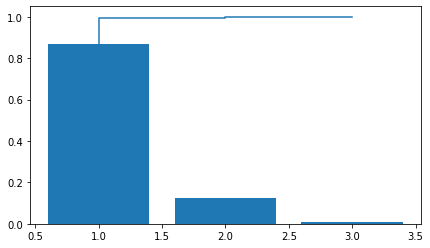

In [22]:
plt.figure(figsize = (7,4))
plt.bar(range(1, len(steps)+1),explained_variance_ratio)
plt.step(range(1,len(steps)+1), steps)
plt.show()

In [23]:
a=np.array([2,6,3])
np.argsort(a)[::-1]

array([1, 2, 0], dtype=int64)

In [24]:
eig_vec, pca.components_

(array([[ 0.9582517 ,  0.27637294, -0.07329168],
        [ 0.24115663, -0.91892239, -0.31212999],
        [ 0.15361365, -0.28142431,  0.94720811]]),
 array([[-0.9582517 , -0.24115663, -0.15361365],
        [ 0.27637294, -0.91892239, -0.28142431]]))

In [25]:
sort_idx = np.argsort(eig_val)[::-1]
w = eig_vec[:,sort_idx[:2]]
w

array([[ 0.9582517 ,  0.27637294],
       [ 0.24115663, -0.91892239],
       [ 0.15361365, -0.28142431]])

In [26]:
X2D_eig = X_centered.dot(w)
X2D_eig[:5]

array([[ 0.9453426 ,  0.28153532],
       [-1.32131286,  0.09376129],
       [ 0.73297879, -0.43386581],
       [ 0.4228709 , -0.5024519 ],
       [-1.12941154, -0.19658556]])

In [27]:
X2D[:5]

array([[-0.9453426 ,  0.28153532],
       [ 1.32131286,  0.09376129],
       [-0.73297879, -0.43386581],
       [-0.4228709 , -0.5024519 ],
       [ 1.12941154, -0.19658556]])

In [28]:
X3D_inv_eig = X2D_eig.dot(w.T)
X3D_inv_eig[:3]

array([[ 0.9836849 , -0.03073347,  0.06598665],
       [-1.24023721, -0.4048027 , -0.2293584 ],
       [ 0.58246941,  0.5754517 ,  0.23469594]])

In [29]:
X_centered[:3]

array([[ 0.98434735, -0.02791223,  0.05742516],
       [-1.23154764, -0.36779612, -0.34166076],
       [ 0.5811708 ,  0.56992129,  0.25147885]])

# Manifold Learning

In [30]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [31]:
t[:5]

array([ 8.24234644, 13.67266022, 11.61126935, 10.35461227,  6.18283002])

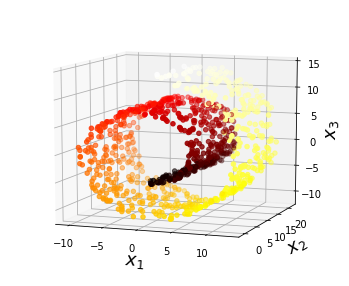

In [32]:
from mpl_toolkits.mplot3d import Axes3D

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

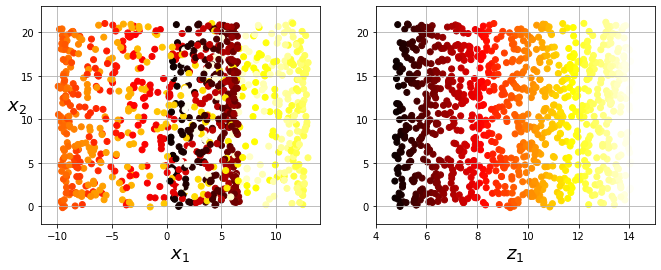

In [33]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)
plt.show()

# MNIST Classification

In [34]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [35]:
from sklearn.model_selection import train_test_split
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

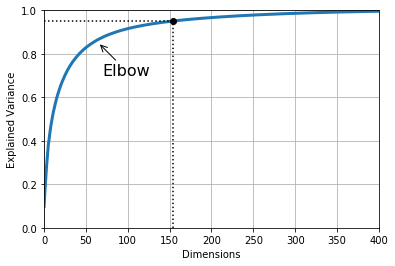

In [37]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [38]:
# We can also set the explained variance ratio in place of n_components  
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [39]:
pca.n_components_

154

In [40]:
np.sum(pca.explained_variance_ratio_)

0.9504451842206042

In [41]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [42]:
import matplotlib as mpl

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

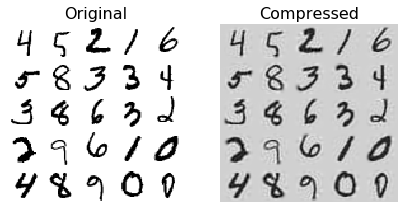

In [43]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [44]:
X_reduced_pca = X_reduced

# Incremental PCA

In [45]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
    # We have to use partial_fit method instead of simple fit
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [46]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

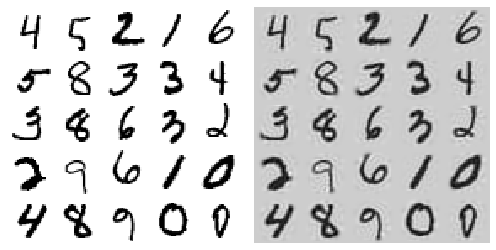

In [47]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()
plt.show()

In [48]:
X_reduced_inc_pca = X_reduced
np.allclose(pca.mean_, inc_pca.mean_)

True

In [49]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

# Kernel PCA

In [50]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [51]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

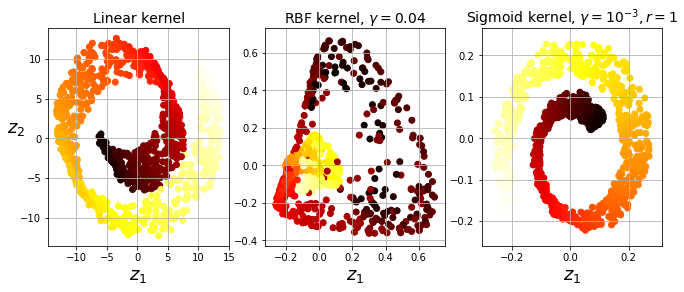

In [52]:
# We have to set fit_inverse_transform=True for getting inverse_transform() method
lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
    'kpca__gamma':np.linspace(0.03, 0.05, 10),
    'kpca__kernel':['sigmoid','rbf']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

In [54]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

In [55]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [56]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766125

# LLE(Locally Linear Embedding)

In [57]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors = 10, random_state=123)
X_reduced = lle.fit_transform(X)

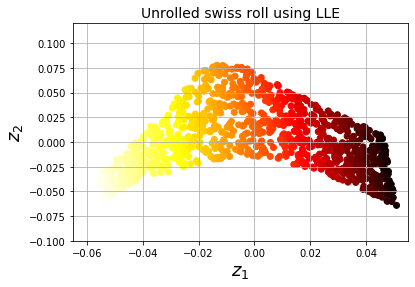

In [58]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

# MDS(Multi-Dimensional Scaling)

In [59]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=123)
X_reduced_mds = mds.fit_transform(X)

# ISOMAP

In [60]:
from sklearn.manifold import Isomap

isomap =Isomap(n_components =2)
X_reduced_isomap = isomap.fit_transform(X)

# t-SNE (t - Distributed Stochastic Neighbor Embedding)

In [61]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=123)
X_reduced_tsne = tsne.fit_transform(X)

# LDA (Linear Discriminant Analysis)

In [62]:
# LDA is actually a supervised learning algorithm unlike other dimensionaity algorithms whivh are mostly unsupervised
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

C:\Users\user\Anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


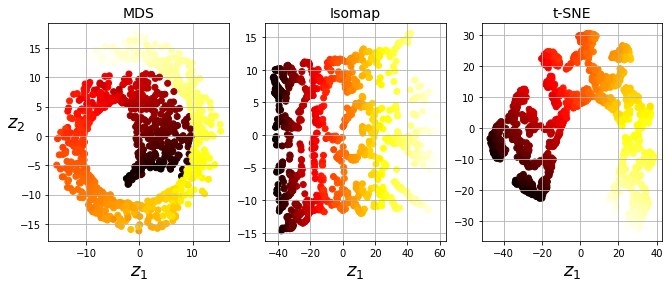

In [63]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()